<IPython.core.display.Javascript object>


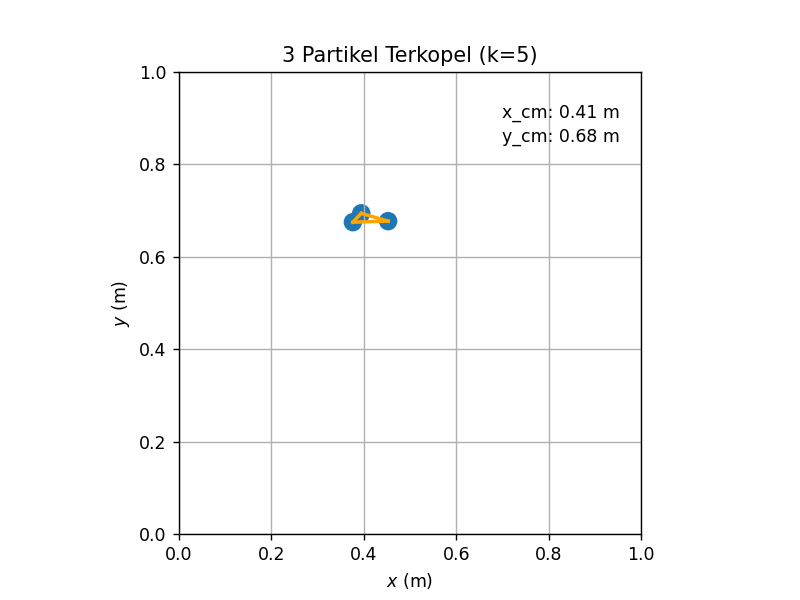

In [1]:
"""Soal No. 1 UAS SPSF - 2020/2021"""
"""10217070 - Laurenzius Yudha P. T
   10217074 - Alessandro Widjati
   10217099 - Iis Rohmatin"""

%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# percepatan gravitasi, m.s-2
g = 9.81
# konstanta pegas, N.m-2
k = 5
# panjang awal pegas
L_0 = 0.1
# panjang maksimum pegas
L_maks = 1.3*L_0
# massa masing-masing partikel (identik), kg
m = 1
# lama waktu simulasi.
t_maks = 10
# koefisien restitusi (-v_up/v_down).
'''Perlu diperhatikan bahwa koefisien restitusi yang digunakan tidak tepat 1,
    walaupun sebenarnya tumbukan yang terjadi bersifat elastik. Hal ini di
    sebabkan karena untuk e = 1, akibat dt tidak tepat infinitesimal, 
    hasil simulasi melanggar konservasi energi.'''
cor = 0.97

# Time step.
dt = 0.01

# Posisi dan kecepatan awal partikel 1.
x1, y1 = 0.5, 0.8
vx1, vy1 = 0, 0

# Posisi dan kecepatan awal partikel 2. 
x2 = x1 + L_0*np.cos(np.pi/3)
y2 = y1 - L_0*np.sin(np.pi/3)
vx2, vy2 = 0, 0

# Posisi dan kecepatan partikel 3.
x3 = x1 - L_0*np.cos(np.pi/3)
y3 = y1 - L_0*np.sin(np.pi/3)
vx3, vy3 = 0, 0

# Posisi pusat massa sistem untuk t = 0
x_cm = (1/3)*(x1 + x2 + x3)
y_cm = (1/3)*(y1 + y2 + y3)

def get_pos(t=0):
    """Untuk mengenerate posisi partikel pada t>0."""
    x_1, y_1, vx_1, vy_1 = x1, y1, vx1, vy1
    x_2, y_2, vx_2, vy_2 = x2, y2, vx2, vy2
    x_3, y_3, vx_3, vy_3 = x3, y3, vx3, vy3
    while t < t_maks:
        t += dt
        
        # Geometri Sistem
        alpha_1 = np.arctan(abs(y_2 - y_1)/abs(x_2 - x_1))
        alpha_2 = np.arctan(abs(y_3 - y_2)/abs(x_3 - x_2))
        alpha_3 = np.arctan(abs(y_1 - y_3)/abs(x_1 - x_3))
        
        L_1 = np.sqrt((x_2 - x_1)**2 + (y_2 - y_1)**2)
        L_2 = np.sqrt((x_3 - x_2)**2 + (y_3 - y_2)**2)
        L_3 = np.sqrt((x_1 - x_3)**2 + (y_1 - y_3)**2)
        
        # menjaga supaya pegas tidak meregang lebih dari panjang maksimumnya
        if L_1 >= L_maks:
            # sumbu x
            if x_1 - x_2 > 0:
                x_1 = x_1 - (L_1 - L_maks)*np.cos(alpha_1)
            else:
                x_2 = x_2 - (L_1 - L_maks)*np.cos(alpha_1)
            #sumbu y
            if y_1 - y_2 > 0:
                y_1 = y_1 - (L_1 - L_maks)*np.sin(alpha_1)
            else:
                y_2 = y_2 - (L_1 - L_maks)*np.sin(alpha_1)
            L_1 = L_maks
            
        if L_2 >= L_maks:
            #sumbu x
            if x_3 - x_2 > 0:
                x_3 = x_3 - (L_2 - L_maks)*np.cos(alpha_2)
            else:
                x_2 = x_2 - (L_2 - L_maks)*np.cos(alpha_2)
            #sumbu y
            if y_3 - y_2 > 0:
                y_3 = y_3 - (L_2 - L_maks)*np.sin(alpha_2)
            else:
                y_2 = y_2 - (L_2 - L_maks)*np.sin(alpha_2)
            L_2 = L_maks
        
        if L_3 >= L_maks:
            #sumbu x
            if x_1 - x_3 > 0:
                x_1 = x_1 - (L_3 - L_maks)*np.cos(alpha_3)
            else:
                x_3 = x_3 - (L_3 - L_maks)*np.cos(alpha_3)
            #sumbu y
            if y_1 - y_3 > 0:
                y_1 = y_1 - (L_3 - L_maks)*np.sin(alpha_3)
            else:
                y_3 = y_3 - (L_3 - L_maks)*np.sin(alpha_3)
            L_3 = L_maks
        
        # Perhitungan besar percepatan akibat gaya pegas
        dL_1 = L_1 - L_0
        dL_2 = L_2 - L_0
        dL_3 = L_3 - L_0
        
        ap_1 = (k/m)*dL_1
        ap_2 = (k/m)*dL_2
        ap_3 = (k/m)*dL_3
        
        # Partikel 1
        x_1 += vx_1 * dt
        y_1 += vy_1 * dt
        vx_1 += (ap_1*np.cos(alpha_1) - ap_3*np.cos(alpha_3)) * dt
        vy_1 += (-g - ap_1*np.sin(alpha_1) - ap_3*np.sin(alpha_3)) * dt
        #vy_1 += -g * dt
        if y_1 < 0:
            # Partikel 1 memantul
            y_1 = 0
            vy_1 = -vy_1 * cor
        if y_1 > 1:
            y_1 = 1
            vy_1 = -vy_1 * cor
        if x_1 < 0:
            x_1 = 0
            vx_1 = -vx_1 * cor
        if x_1 > 1:
            x_1 = 1
            vx_1 = -vx_1 * cor
            
        # Partikel 2
        x_2 += vx_2 * dt
        y_2 += vy_2 * dt
        vx_2 += (-ap_1*np.cos(alpha_1) - ap_2*np.cos(alpha_2)) * dt
        vy_2 += (-g + ap_1*np.sin(alpha_1) + ap_2*np.sin(alpha_2)) * dt
        if y_2 < 0:
            # Partikel 2 memantul
            y_2 = 0
            vy_2 = -vy_2 * cor
        if y_2 > 1:
            y_2 = 1
            vy_2 = -vy_2 * cor
        if x_2 < 0:
            x_2 = 0
            vx_2 = -vx_2 * cor
        if x_2 > 1:
            x_2 = 1
            vx_2 = -vx_2 * cor
            
        # Partikel 3
        x_3 += vx_3 * dt
        y_3 += vy_3 * dt
        vx_3 += (ap_2*np.cos(alpha_2) + ap_3*np.cos(alpha_3)) * dt
        vy_3 += (- g - ap_2*np.sin(alpha_2) + ap_3*np.sin(alpha_3)) * dt
        if y_3 < 0:
            # Partikel 3 memantul
            y_3 = 0
            vy_3 = - vy_3 * cor
        if y_3 > 1:
            y_3 = 1
            vy_3 = -vy_3 * cor
        if x_3 < 0:
            x_3 = 0
            vx_3 = -vx_3 * cor
        if x_3 > 1:
            x_3 = 1
            vx_3 = -vx_3 * cor
        
        #Posisi pusat massa sistem untuk t>0
        x_cm_t = (1/3)*(x_1 + x_2 + x_3)
        y_cm_t = (1/3)*(y_1 + y_2 + y_3)
        
        yield x_1, y_1, x_2, y_2, x_3, y_3, x_cm_t, y_cm_t, vx_1, vy_1, vx_2, vy_2, vx_3, vy_3

def init():
    """Inisialisasi figur animasi."""
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x$ (m)')
    ax.set_ylabel('$y$ (m)')
    plt.title('3 Partikel Terkopel (k=5)')
    line1.set_data([x1, x2], [y1, y2])
    line2.set_data([x2, x3], [y2, y3])
    line3.set_data([x3, x1], [y3, y1])
    ball_1.set_center((x1, y1))
    ball_2.set_center((x2, y2))
    ball_3.set_center((x3, y3))
    width_text.set_text(f'x_cm: {x_cm:.2f} m')
    height_text.set_text(f'y_cm: {y_cm:.2f} m')
    return line1, line2, line3, ball_1, ball_2, ball_3, width_text, height_text

def animate(pos):
    """Untuk setiap frame, menggerakkan animasi ke posisi selanjutnya, pos."""
    x_1, y_1, x_2, y_2, x_3, y_3, x_cm_t, y_cm_t, vx_1, vy_1, vx_2,vy_2, vx_3, vy_3  = pos
    
    #posisi
    x_1data.append(x_1)
    y_1data.append(y_1)
    
    x_2data.append(x_2)
    y_2data.append(y_2)
    
    x_3data.append(x_3)
    y_3data.append(y_3)
    
    #kecepatan
    vx_1data.append(vx_1)
    vy_1data.append(vy_1)
    
    vx_2data.append(vx_2)
    vy_2data.append(vy_2)
    
    vx_3data.append(vx_3)
    vy_3data.append(vy_3)

    line1.set_data([x_1data[-1], x_2data[-1]], [y_1data[-1], y_2data[-1]])
    line2.set_data([x_2data[-1], x_3data[-1]], [y_2data[-1], y_3data[-1]])
    line3.set_data([x_3data[-1], x_1data[-1]], [y_3data[-1], y_1data[-1]])
    
    ball_1.set_center((x_1, y_1))
    ball_2.set_center((x_2, y_2))
    ball_3.set_center((x_3, y_3))
    
    width_text.set_text(f'x_cm: {x_cm_t:.2f} m')
    height_text.set_text(f'y_cm: {y_cm_t:.2f} m')
    return line1, line2, line3, ball_1, ball_2, ball_3, width_text, height_text

# Set up Figure baru, dengan aspect ratio yang sama.
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.grid()

# Objek-objek yang menjadi perhatian.
line1, = ax.plot([], [], lw=2, color = 'orange')
line2, = ax.plot([], [], lw=2, color = 'orange')
line3, = ax.plot([], [], lw=2, color = 'orange')

ball_1 = plt.Circle((x1, y1), 0.02)
ball_2 = plt.Circle((x2, y2), 0.02)
ball_3 = plt.Circle((x3, y3), 0.02)

width_text = ax.text(0.7, 0.9, f'x_cm: {x_cm:.2f} m')
height_text = ax.text(0.7, 0.85, f'y_cm: {y_cm:.2f} m')
ax.add_patch(ball_1)
x_1data, y_1data = [], []
ax.add_patch(ball_2)
x_2data, y_2data = [], []
ax.add_patch(ball_3)
x_3data, y_3data = [], []

vx_1data, vy_1data = [], []
vx_2data, vy_2data = [], []
vx_3data, vy_3data = [], []

x_cm_tdata, y_cm_tdata = [], []

interval = 3000*dt
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True, save_count = 700,
                      interval=interval, repeat=False, init_func=init)

plt.show()

In [ ]:
import matplotlib

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps = 25, metadata = dict(artist = 'Me'), bitrate = 1800)

In [ ]:
ani.save('3 Partikel Terkopel (k=5).mp4', writer = writer)

In [2]:
#Energi kinetik sistem terhadap waktu
arr_vx_1 = np.array(vx_1data)
arr_vy_1 = np.array(vy_1data)
arr_vx_2 = np.array(vx_2data)
arr_vy_2 = np.array(vy_2data)
arr_vx_3 = np.array(vx_3data)
arr_vy_3 = np.array(vy_3data)

EK = np.empty(len(arr_vx_1))
for i in range(len(EK)):
    EK[i] = (m/2)*(arr_vx_1[i]**2 + arr_vy_1[i]**2 + arr_vx_2[i]**2 + arr_vy_2[i]**2 + arr_vx_3[i]**2 + arr_vy_3[i]**2)

In [3]:
#Energi potensial sistem terhadap waktu
arr_x_1 = np.array(x_1data)
arr_y_1 = np.array(y_1data)
arr_x_2 = np.array(x_2data)
arr_y_2 = np.array(y_2data)
arr_x_3 = np.array(x_3data)
arr_y_3 = np.array(y_3data)

arr_L_1 = np.sqrt(np.square(arr_x_2 - arr_x_1) + np.square(arr_y_2 - arr_y_1))
arr_L_2 = np.sqrt(np.square(arr_x_3 - arr_x_2) + np.square(arr_y_3 - arr_y_2))
arr_L_3 = np.sqrt(np.square(arr_x_1 - arr_x_3) + np.square(arr_y_1 - arr_y_3))

#EP total = EP pegas + EP grav
EP = np.empty(len(arr_x_1))
for j in range(len(EP)):
    EP[j] = (k/2)*((arr_L_1[j] - L_0)**2 + (arr_L_2[j] - L_0)**2 + (arr_L_3[j] - L_0)**2) + m*g*(arr_y_1[j] + arr_y_2[j] + arr_y_3[j])

In [4]:
#Energi total sistem
E = EK + EP

<IPython.core.display.Javascript object>


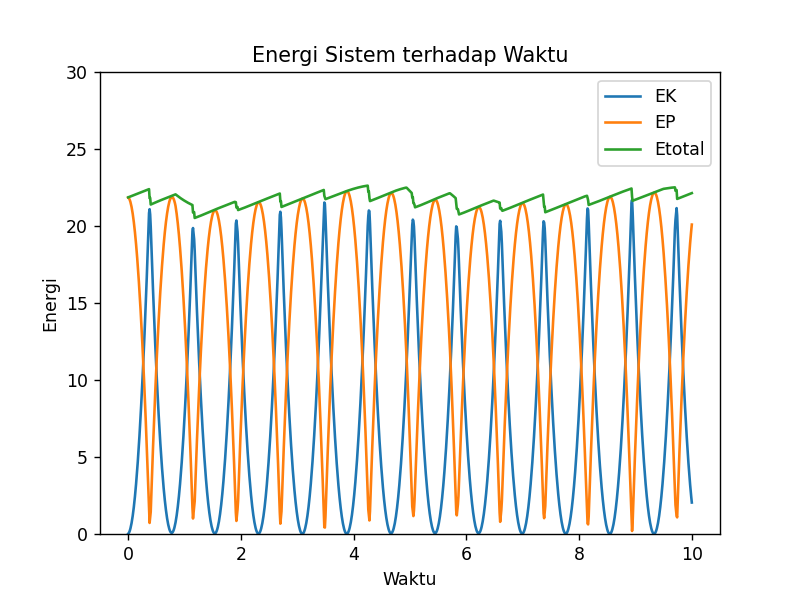

In [5]:
t = np.linspace(0, 10, 1001)

fig_E, ax_E = plt.subplots()
ax_E.set_ylim(0, 30)
ax_E.plot(t, EK, label = 'EK')
ax_E.plot(t, EP, label = 'EP')
ax_E.plot(t, E, label = 'Etotal')
plt.legend(loc='upper right')
plt.title('Energi Sistem terhadap Waktu')
plt.xlabel('Waktu')
plt.ylabel('Energi')
plt.show()

<IPython.core.display.Javascript object>


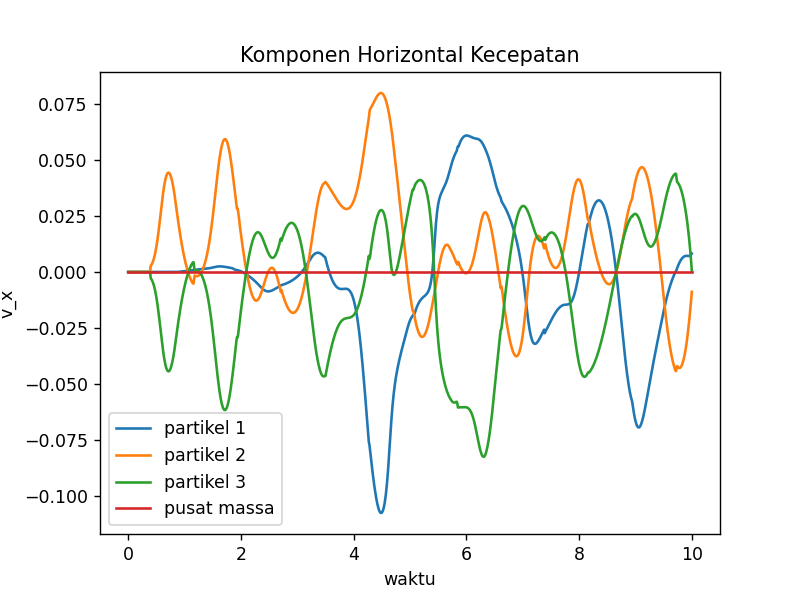

In [6]:
arr_v_cm_x = (1/3)*(arr_vx_1 + arr_vx_2 + arr_vx_3)

plt.plot(t, arr_vx_1, label = 'partikel 1')
plt.plot(t, arr_vx_2, label = 'partikel 2')
plt.plot(t, arr_vx_3, label = 'partikel 3')
plt.plot(t, arr_v_cm_x, label = 'pusat massa')
plt.legend()
plt.xlabel('waktu')
plt.ylabel('v_x')
plt.title('Komponen Horizontal Kecepatan')
plt.show()

<IPython.core.display.Javascript object>


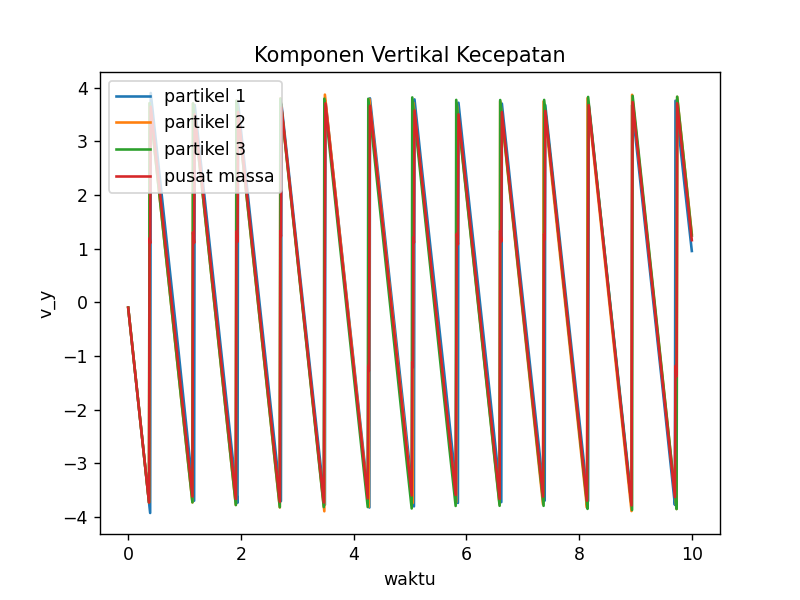

In [7]:
arr_v_cm_y = (1/3)*(arr_vy_1 + arr_vy_2 + arr_vy_3)

plt.plot(t, arr_vy_1, label = 'partikel 1')
plt.plot(t, arr_vy_2, label = 'partikel 2')
plt.plot(t, arr_vy_3, label = 'partikel 3')
plt.plot(t, arr_v_cm_y, label = 'pusat massa')
plt.legend()
plt.xlabel('waktu')
plt.ylabel('v_y')
plt.title('Komponen Vertikal Kecepatan')
plt.show()